## Workflow compare synthetic community to native human microbiota data from the MetaCardis study
Forslund, S.K., Chakaroun, R., Zimmermann-Kogadeeva, M. et al. Combinatorial, additive and dose-dependent drug–microbiome associations. Nature 600, 500–505 (2021). https://doi.org/10.1038/s41586-021-04177-9


Data can be downloaded from https://zenodo.org/records/6242715

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from os import listdir
from os.path import isfile, join

%matplotlib inline
#%matplotlib qt

In [2]:
# define data folder
human_data_folder = '..\\InputData\\human_microbiome_data\\'

In [3]:
# define figure folder
figure_folder = '..\\Figures\\'

In [26]:
output_table_folder = '..\\ProcessedData\\output\\'

In [4]:
mydata = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Phylum.v2.data.frame.r',
                    sep='\t')

In [5]:
# pivot table to have samples vs features matrix
mydatatable = pd.pivot_table(mydata, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [6]:
# normalize features to 1 (compositional data)
mydatatable_norm = mydatatable.div(mydatatable.sum(axis=1), axis=0)

In [101]:
mydatatable_norm.shape

(1818, 33)

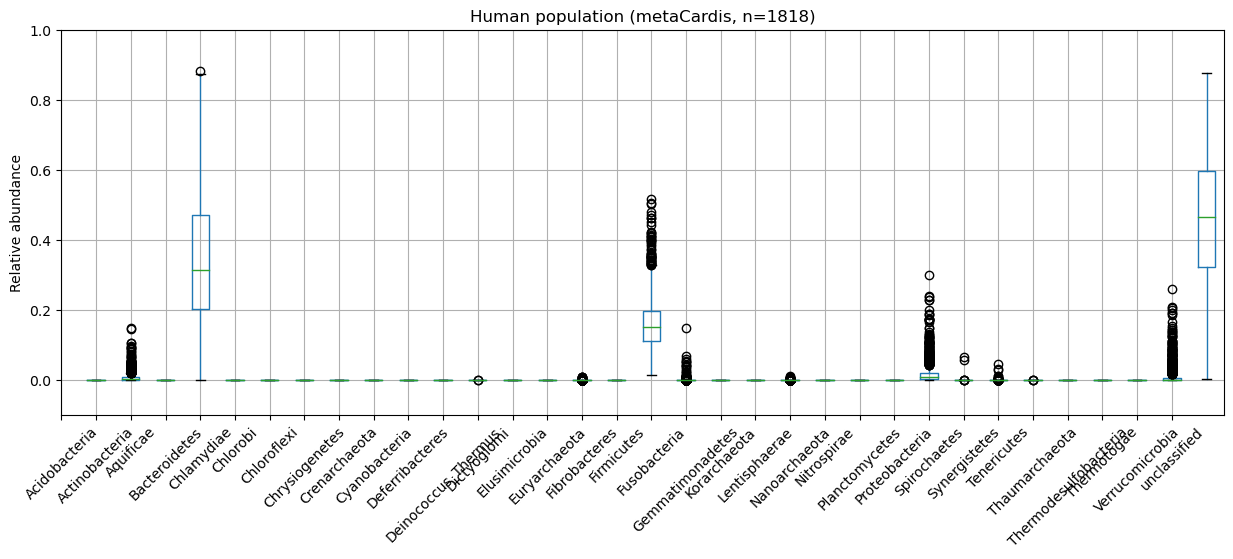

In [7]:
# plot distribution of all species across individuals
fig = plt.figure(figsize=(15, 5))
mydatatable_norm.boxplot()
plt.xticks(np.arange(0, mydatatable_norm.shape[1]), mydatatable_norm.columns);
plt.xticks(rotation=45);
ax = plt.gca()
ax.set_ylim([-0.1, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')');


In [8]:
print('Total number of phyla: ', np.shape(mydatatable_norm.columns))

Total number of phyla:  (33,)


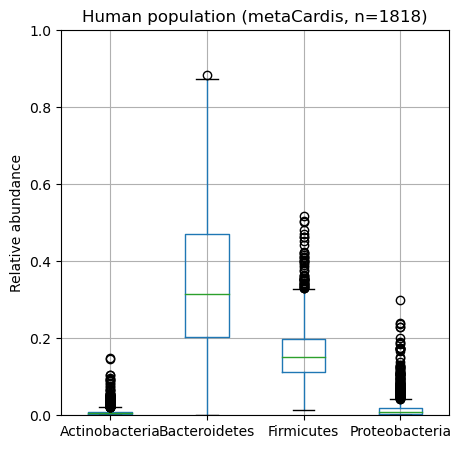

In [9]:
# plot distributions of relative phylum abundances in human samples
fig = plt.figure(figsize=(5, 5))
mydatatable_norm.boxplot(column = ['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria'])
ax = plt.gca()
ax.set_ylim([0, 1])
ax.set_ylabel('Relative abundance')
ax.set_title('Human population (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_phylum_distribution.pdf',
                format='pdf',
                bbox_inches='tight')

## Check on species level representation of the 14 community

In [10]:
mydata_species = pd.read_csv(human_data_folder + 'hub.cellcount.motu.Species.v2.data.frame.r',
                    sep='\t')

In [11]:
# pivot table to have samples vs features
mydata_species_table = pd.pivot_table(mydata_species, values='FeatureValue',
                             index=['SampleID'],
                            columns = ['Feature'])

In [12]:
# normalize relative abundance
mydata_species_table = mydata_species_table.div(mydata_species_table.sum(axis=1), axis=0) 

In [13]:
my_species = ['Bacteroides_uniformis',
             'Bacteroides_thetaiotaomicron',
             'Bacteroides_ovatus',
             'Bacteroides_caccae',
             'Bacteroides_stercoris',
             'Parabacteroides_distasonis',
             'Bifidobacterium_adolescentis',
             'Collinsella_aerofaciens',
             'Escherichia_coli',
             'Marvinbryantia_formatexigens',
             'Clostridium_symbiosum',
             '_Ruminococcus__obeum',#'Blautia_obeum',
             'Clostridium_scindens',
             '_Ruminococcus__torques']

In [14]:
set(my_species).intersection(mydata_species_table.columns)

{'Bacteroides_caccae',
 'Bacteroides_ovatus',
 'Bacteroides_stercoris',
 'Bacteroides_thetaiotaomicron',
 'Bacteroides_uniformis',
 'Bifidobacterium_adolescentis',
 'Clostridium_scindens',
 'Clostridium_symbiosum',
 'Collinsella_aerofaciens',
 'Escherichia_coli',
 'Marvinbryantia_formatexigens',
 'Parabacteroides_distasonis',
 '_Ruminococcus__obeum',
 '_Ruminococcus__torques'}

In [15]:
findspecies = 'torques'#'obeum'
[test for test in mydata_species_table.columns if test.find(findspecies)>0]

['_Ruminococcus__torques']

In [16]:
mydata_species_table_selected = mydata_species_table.loc[:,my_species].copy()

In [27]:
mydata_species_table_selected.to_csv(output_table_folder +  
                                      'metacardis_selected_species_abundance.csv')

In [28]:
mydata_species_table_selected_prevalence = mydata_species_table_selected.copy()
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence.fillna(0)

In [29]:
mydata_species_table_selected_prevalence = mydata_species_table_selected_prevalence>0

In [30]:
myspecies_prevalence = mydata_species_table_selected_prevalence.sum(axis=0)*100/mydata_species_table_selected_prevalence.shape[0]

In [31]:
print("Median prevalence: ", np.median(myspecies_prevalence))

Median prevalence:  83.03080308030803


In [32]:
print("Mean prevalence: ", np.mean(myspecies_prevalence))

Mean prevalence:  69.72340091151973


In [33]:
mysort = ['Marvinbryantia_formatexigens',
          'Clostridium_symbiosum',
          '_Ruminococcus__obeum',
          'Clostridium_scindens',
          '_Ruminococcus__torques',
          'Bifidobacterium_adolescentis',
          'Collinsella_aerofaciens',
          'Bacteroides_ovatus',
          'Bacteroides_caccae',
          'Bacteroides_thetaiotaomicron',
          'Bacteroides_uniformis',
          'Bacteroides_stercoris',
          'Parabacteroides_distasonis',
          'Escherichia_coli']

In [34]:
myspecies_prevalence

Feature
Bacteroides_uniformis           97.029703
Bacteroides_thetaiotaomicron    91.639164
Bacteroides_ovatus              94.994499
Bacteroides_caccae              72.497250
Bacteroides_stercoris           61.001100
Parabacteroides_distasonis      91.034103
Bifidobacterium_adolescentis    67.381738
Collinsella_aerofaciens         85.093509
Escherichia_coli                80.968097
Marvinbryantia_formatexigens     0.660066
Clostridium_symbiosum           30.363036
_Ruminococcus__obeum            92.354235
Clostridium_scindens            15.346535
_Ruminococcus__torques          95.764576
dtype: float64

In [35]:
myspecies_prevalence = myspecies_prevalence.loc[mysort]

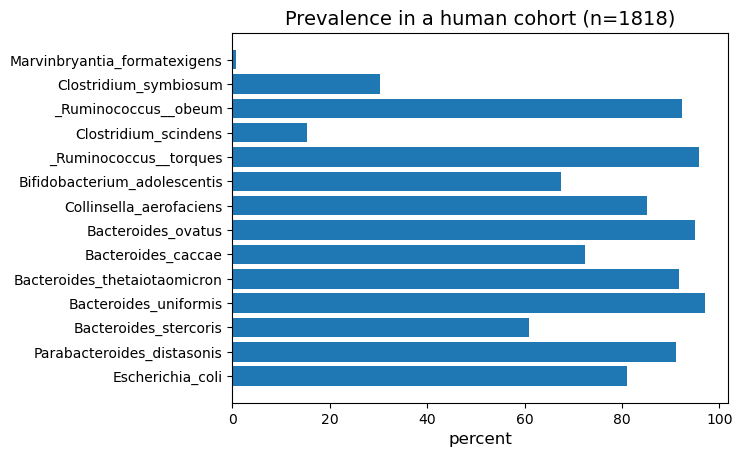

In [36]:
fig, ax = plt.subplots()
ax.barh(range(len(myspecies_prevalence)), myspecies_prevalence)
ax.set_yticks(range(len(myspecies_prevalence)))
ax.set_yticklabels(myspecies_prevalence.index)
#ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
#plt.ylabel('number of people', fontsize=12)
plt.title('Prevalence in a human cohort (n='+str(mydata_species_table_selected_prevalence.shape[0])+')', fontsize=14)
plt.gca().invert_yaxis()
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( figure_folder + 'myspecies_prevalence_humans.pdf',
                format='pdf',
                bbox_inches='tight')

In [37]:
print('Species prevalence in human cohort (n=', str(mydata_species_table_selected_prevalence.shape[0]),
      '): mean = ', np.mean(myspecies_prevalence),
      '; median = ', np.median(myspecies_prevalence))

Species prevalence in human cohort (n= 1818 ): mean =  69.72340091151973 ; median =  83.03080308030803


In [38]:
#plt.hist(mydata_species_table_selected.sum(axis=1),bins=100)
#mydata_species_table_selected.sum(axis=1).mean()
#mydata_species_table_selected.sum(axis=1).median()

In [39]:
# bar number of species in each individual
species_per_indivudual = (mydata_species_table_selected>0).sum(axis=1)
species_per_indivudual_sum = []
for i in range(1,15):
    species_per_indivudual_sum.append(np.sum(species_per_indivudual==i))

In [40]:
species_per_indivudual_sum

[0, 1, 2, 7, 22, 34, 71, 179, 338, 540, 486, 115, 23, 0]

In [41]:
print('Median species per individual: ', np.median(species_per_indivudual), 
      ' (n=', str(mydata_species_table_selected_prevalence.shape[0]), ')')

Median species per individual:  10.0  (n= 1818 )


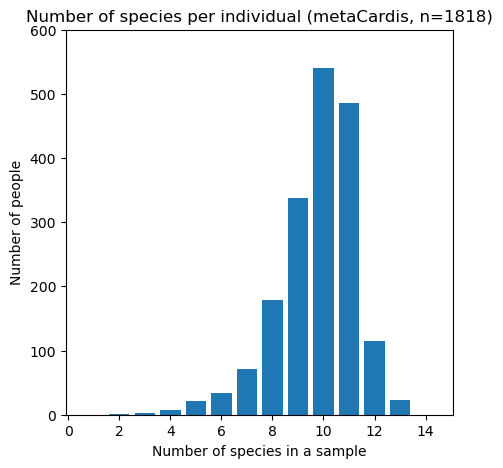

In [42]:
fig = plt.figure(figsize=(5, 5))
plt.bar(range(1,15), species_per_indivudual_sum)
ax = plt.gca()
ax.set_ylim([0, 600])
ax.set_xlabel('Number of species in a sample')
ax.set_ylabel('Number of people')
ax.set_title('Number of species per individual (metaCardis, n=' + str(mydatatable_norm.shape[0]) + ')')
plt.savefig( figure_folder + 'metacardis_number_of_species_per_sample.pdf',
                format='pdf',
                bbox_inches='tight')

In [43]:
# normalize relative abundance by 14
mydata_species_table_selected_norm = mydata_species_table_selected.div(mydata_species_table_selected.sum(axis=1), axis=0) 

In [44]:
#fig = plt.figure(figsize=(20, 20))
#mydata_species_table_selected_norm.boxplot()
#plt.savefig( 'phylum_distribution.pdf',
#                format='pdf',
#                bbox_inches='tight')

In [45]:
#fig = plt.figure(figsize=(20, 20))
#mydata_species_table_selected.boxplot()
#plt.savefig( 'phylum_distribution.pdf',
#                format='pdf',
#                bbox_inches='tight')

### Read OTU table to map species relative abundance in the mice to the one in the humans

In [46]:
mouse_data_folder = '..\\ProcessedData\\sequencing\\'
otu_table = pd.read_csv(mouse_data_folder + 'merged_humann2_metaphlan_bugs_list_mouseDNA_OTUs.txt',
                    sep='\t')

In [47]:
otu_table_phyla = otu_table[(otu_table['ID'].str.find('|p_')>0) & (otu_table['ID'].str.find('|c_')<0) ]

In [48]:
otu_table_phyla = otu_table_phyla.melt(id_vars="ID")

In [49]:
#otu_table_phyla.set_index("ID",drop=True, inplace=True)

In [50]:
otu_table_phyla.value=otu_table_phyla.value.astype(float)

In [51]:
# rename names of phyla
otu_table_phyla.ID = [x[x.find('p__')+3:] for x in otu_table_phyla.ID]

In [52]:
# remove Verrucomicrobia and Viruses
otu_table_phyla = otu_table_phyla[(~otu_table_phyla['ID'].str.contains('Verruco')) & 
                                  (~otu_table_phyla['ID'].str.contains('Viruses'))]

In [53]:
# normalize to 1
otu_table_phyla.loc[:,'value'] = otu_table_phyla.loc[:,'value']/100

In [54]:
import seaborn as sns

C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


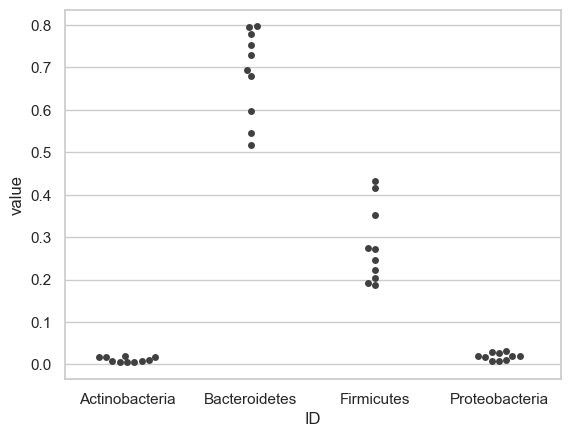

In [55]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#ax = sns.boxplot(x="ID", y="value", data=otu_table_phyla, showfliers = False)
ax = sns.swarmplot(x="ID", y="value", data=otu_table_phyla, color=".25")

plt.show()

In [57]:
# to plot human and mouse data together, rename Actinobateria to 1, Bacteroidetes to 2, Firmicutes to 3 and Proteobacteria to 4
otu_table_phyla_plot = otu_table_phyla.copy()
otu_table_phyla_plot.ID = otu_table_phyla_plot.ID.replace(['Actinobacteria',
                                                        'Bacteroidetes',
                                                        'Firmicutes',
                                                        'Proteobacteria'], [1, 2, 3, 4])

C:\Users\mazimmer\AppData\Local\Temp\ipykernel_10448\494305919.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  otu_table_phyla_plot.ID = otu_table_phyla_plot.ID.replace(['Actinobacteria',


In [62]:
otu_table_phyla_plot

,ID,variable,value
0,1,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.016872
1,2,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.680629
2,3,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.273597
3,4,MSZ11_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.027932
6,1,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.017566
7,2,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.597101
8,3,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.351248
9,4,MSZ12_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.032483
12,1,MSZ13_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.018398
13,2,MSZ13_dna_kneaddata_paired_cat_metaphlan_bugs_...,0.545465


C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


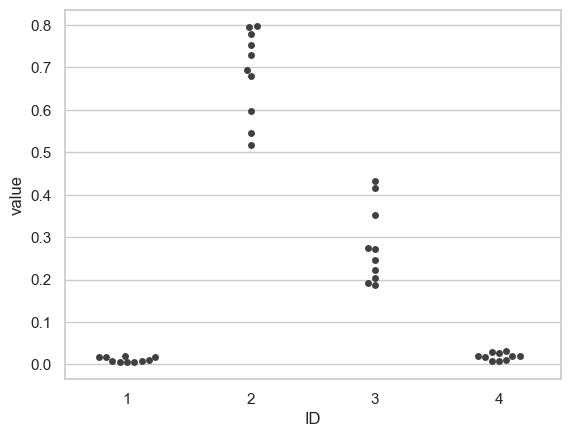

In [63]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

#ax = sns.boxplot(x="ID", y="value", data=otu_table_phyla, showfliers = False)
ax = sns.swarmplot(x=otu_table_phyla_plot.ID, y=otu_table_phyla_plot.value, color=".25")

plt.show()

In [64]:
# prepare human data for plotting
mydatatable_norm_plot =  mydatatable_norm.loc[:,['Actinobacteria', 'Bacteroidetes', 
                                    'Firmicutes', 'Proteobacteria']]

In [65]:
# normalize by four phyla 
mydatatable_norm_plot_phyla = mydatatable_norm_plot.div(mydatatable_norm_plot.sum(axis=1), axis=0)

mydatatable_norm_plot_phyla.rename(columns={'Actinobacteria': 1,
                                      'Bacteroidetes': 2,
                                      'Firmicutes': 3,
                                      'Proteobacteria': 4}, inplace=True)
mydatatable_norm_plot_phyla = mydatatable_norm_plot_phyla.melt()

In [66]:
# use original relative abundances 
mydatatable_norm_plot.rename(columns={'Actinobacteria': 1,
                                      'Bacteroidetes': 2,
                                      'Firmicutes': 3,
                                      'Proteobacteria': 4}, inplace=True)
mydatatable_norm_plot = mydatatable_norm_plot.melt()

C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\mazimmer\AppData\Local\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30

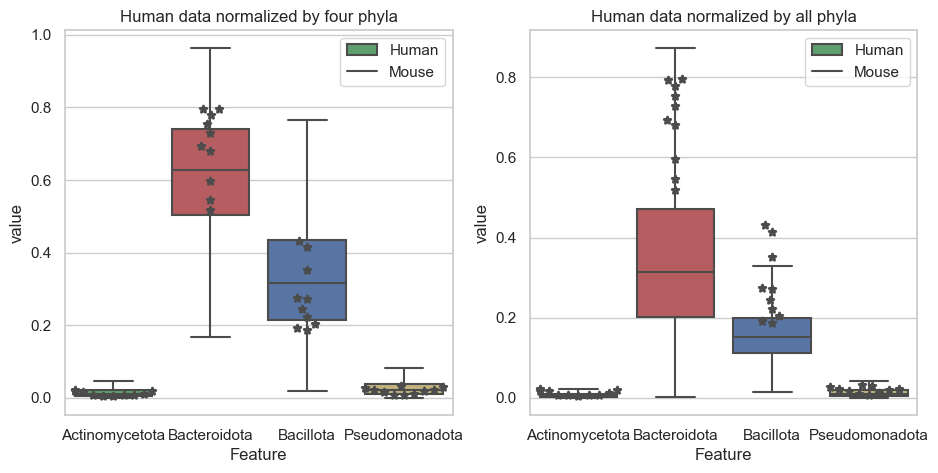

In [67]:
# plot distributions of relative phylum abundances in human samples
f, [ax1, ax2] = plt.subplots(1,2, figsize=(11,5), )
# define colors for different phyla
my_colors = {1: "g", 2: "r", 3:"b", 4: "y"}

# first plot relative abundances normalized by the four phyla
# plot human data distributions
sns.boxplot(x="Feature", y="value", data=mydatatable_norm_plot_phyla, palette=my_colors, showfliers = False ,ax=ax1)
# plot mouse data samples
g = sns.swarmplot(x="ID", y="value", data=otu_table_phyla_plot, marker="*", linewidth=2,ax=ax1)
# set legend
#g.set_xticklabels(['Actinobacteria', 'Bacteroidetes', 'Firmicutes', 'Proteobacteria'])
g.set_xticklabels(['Actinomycetota', 'Bacteroidota', 'Bacillota', 'Pseudomonadota'])
ax1.legend(['Human', 'Mouse'])
ax1.set_title('Human data normalized by four phyla')

# next plot original human data relative abundances
# plot human data distributions
sns.boxplot(x="Feature", y="value", data=mydatatable_norm_plot, palette=my_colors, showfliers = False ,ax=ax2)
# plot mouse data samples
g = sns.swarmplot(x="ID", y="value", data=otu_table_phyla_plot, marker="*", linewidth=2,ax=ax2)
# set legend
g.set_xticklabels(['Actinomycetota', 'Bacteroidota', 'Bacillota', 'Pseudomonadota'])
ax2.legend(['Human', 'Mouse'])
ax2.set_title('Human data normalized by all phyla')

# save picture
plt.savefig( figure_folder + 'metacardis_phylum_distribution_with_mouse_data.pdf',
                format='pdf',
                bbox_inches='tight')

### Read KEGG modules to compare metabolic/functional potential

In [68]:
mydata_KEGG = pd.read_csv(human_data_folder + 'hub.adjusted_KEGG_module.down.10000000.v3.data.frame.r',
                    sep='\t')

In [69]:
len(set(mydata_KEGG.FeatureDisplayName))

660

In [70]:
mydata_KEGG = pd.pivot_table(mydata_KEGG, values='FeatureValue',
                             index=['FeatureDisplayName'],
                            columns = ['SampleID'])

In [71]:
mydata_KEGG = mydata_KEGG>0

In [72]:
mydata_KEGG.sum()

SampleID
x10MCx1134    567
x10MCx1135    547
x10MCx1138    532
x10MCx1140    552
x10MCx1143    540
             ... 
x30MCx3384    594
x30MCx3412    547
x30MCx3414    604
x30MCx3422    564
x30MCx3423    600
Length: 1857, dtype: int64

In [73]:
np.min(mydata_KEGG.sum())

488

In [74]:
np.max(mydata_KEGG.sum())

617

In [75]:
mydata_KEGG = mydata_KEGG.drop(index=['-1'])

In [76]:
mydata_species_table_selected_prevalence.index

Index(['x10MCx1134', 'x10MCx1135', 'x10MCx1138', 'x10MCx1140', 'x10MCx1143',
       'x10MCx1144', 'x10MCx1145', 'x10MCx1146', 'x10MCx1151', 'x10MCx1153',
       ...
       'x30MCx3372', 'x30MCx3375', 'x30MCx3376', 'x30MCx3379', 'x30MCx3382',
       'x30MCx3384', 'x30MCx3412', 'x30MCx3414', 'x30MCx3422', 'x30MCx3423'],
      dtype='object', name='SampleID', length=1818)

In [77]:
mydata_KEGG = mydata_KEGG.loc[:, mydata_species_table_selected_prevalence.index]

In [78]:
mydata_KEGG.shape

(659, 1818)

Read eggNOG genome annotations

In [81]:
genomeFolder = '..\\InputData\\genomes14_eggnog\\'
onlyfiles = [f for f in listdir(genomeFolder) if isfile(join(genomeFolder, f))]

In [82]:
keggmodules_df_joint = []
for myfile in onlyfiles:
    mydata_genome = pd.read_csv(genomeFolder + '\\' + myfile,
                    sep='\t', skiprows=4, header=None) 
    keggmodules = mydata_genome.iloc[:,10]
    # remove unnannotated
    keggmodules = list(keggmodules.dropna())
    # split and keep unique module names
    keggmodules = list(set([x for xs in keggmodules for x in xs.split(',')]))
    keggmodules_df = pd.DataFrame(1, index=keggmodules, columns=[myfile])
    if len(keggmodules_df_joint)==0:
        keggmodules_df_joint = keggmodules_df.copy()
    else:
        keggmodules_df_joint = keggmodules_df_joint.add(keggmodules_df,fill_value=0)

In [83]:
#mydata_genome = pd.read_csv(genomeFolder + '\Rtor_job_MM_k9659i1d_annotations.tsv',
#                    sep='\t', skiprows=4, header=None) 

In [84]:
# fill nas with 0 in all columns
keggmodules_df_joint = keggmodules_df_joint.fillna(0)

In [85]:
#sort by sum of 1 in columns 
s = keggmodules_df_joint.sum()
keggmodules_df_joint = keggmodules_df_joint[s.sort_values(ascending=True).index]

In [86]:
keggmodules_df_joint_sum = keggmodules_df_joint.copy()
for i in range(1,keggmodules_df_joint_sum.shape[1]):
    keggmodules_df_joint_sum.iloc[:,i] = keggmodules_df_joint_sum.iloc[:,i] + keggmodules_df_joint_sum.iloc[:,i-1]

In [87]:
keggmodules_df_joint_sum = keggmodules_df_joint_sum.clip(0,1)

In [88]:
keggmodules_df_joint['Ecol_job_MM_zytof08m_annotations.tsv'].sum()

359.0

In [89]:
keggmodules_df_joint_sum['Ecol_job_MM_zytof08m_annotations.tsv'].sum()

486.0

In [90]:
keggmodules_df_joint.sum()

Bado_job_MM_b7bducjs_annotations.tsv    208.0
Caer_job_MM_m4r45lgn_annotations.tsv    216.0
Rtor_job_MM_k9659i1d_annotations.tsv    226.0
Bste_job_MM_qm0yvy7j_annotations.tsv    234.0
Bobe_job_MM_basuua3b_annotations.tsv    242.0
Bcac_job_MM_w5lxxvou_annotations.tsv    245.0
Buni_job_MM_vm_dztk6_annotations.tsv    252.0
Bthe_job_MM_tpt9epfc_annotations.tsv    253.0
Bova_job_MM_yzguie9o_annotations.tsv    256.0
Pdis_job_MM_ujnclh_z_annotations.tsv    257.0
Mfor_job_MM_r7_0p66z_annotations.tsv    263.0
Csci_job_MM_k3nkbpw7_annotations.tsv    267.0
Csym_job_MM_nfwroj53_annotations.tsv    301.0
Ecol_job_MM_zytof08m_annotations.tsv    359.0
dtype: float64

In [91]:
keggmodules_df_joint_sum.sum()

Bado_job_MM_b7bducjs_annotations.tsv    208.0
Caer_job_MM_m4r45lgn_annotations.tsv    268.0
Rtor_job_MM_k9659i1d_annotations.tsv    304.0
Bste_job_MM_qm0yvy7j_annotations.tsv    346.0
Bobe_job_MM_basuua3b_annotations.tsv    365.0
Bcac_job_MM_w5lxxvou_annotations.tsv    373.0
Buni_job_MM_vm_dztk6_annotations.tsv    376.0
Bthe_job_MM_tpt9epfc_annotations.tsv    378.0
Bova_job_MM_yzguie9o_annotations.tsv    383.0
Pdis_job_MM_ujnclh_z_annotations.tsv    389.0
Mfor_job_MM_r7_0p66z_annotations.tsv    405.0
Csci_job_MM_k3nkbpw7_annotations.tsv    429.0
Csym_job_MM_nfwroj53_annotations.tsv    451.0
Ecol_job_MM_zytof08m_annotations.tsv    486.0
dtype: float64

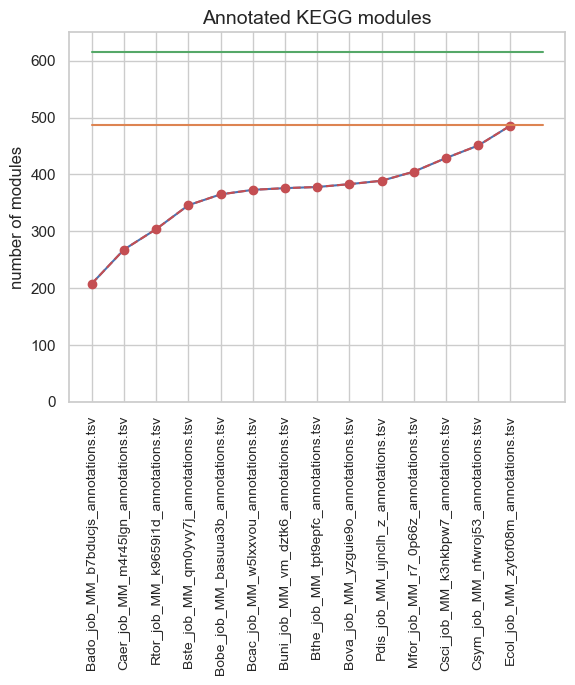

In [92]:
fig, ax = plt.subplots()
ax.plot(keggmodules_df_joint_sum.sum(), '-')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.plot(keggmodules_df_joint_sum.sum(), marker='o', linestyle='--', color='r')

plt.plot([0, 14], [np.min(mydata_KEGG.sum()),np.min(mydata_KEGG.sum())])
plt.plot([0, 14], [np.max(mydata_KEGG.sum()),np.max(mydata_KEGG.sum())])
ax.set_ylim([0, 650]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
#plt.xlabel('x', fontsize=12)
plt.ylabel('number of modules', fontsize=12)
plt.title('Annotated KEGG modules', fontsize=14)
plt.savefig( figure_folder + 'kegg_modules_cumulative_species.pdf',
                format='pdf',
                bbox_inches='tight')

In [93]:
#keggmodules_df_joint.to_csv('testjoint.csv')
#keggmodules_df_joint_sum.to_csv('testjoint_sum.csv')
keggmodules_df_joint_sum

,Bado_job_MM_b7bducjs_annotations.tsv,Caer_job_MM_m4r45lgn_annotations.tsv,Rtor_job_MM_k9659i1d_annotations.tsv,Bste_job_MM_qm0yvy7j_annotations.tsv,Bobe_job_MM_basuua3b_annotations.tsv,Bcac_job_MM_w5lxxvou_annotations.tsv,Buni_job_MM_vm_dztk6_annotations.tsv,Bthe_job_MM_tpt9epfc_annotations.tsv,Bova_job_MM_yzguie9o_annotations.tsv,Pdis_job_MM_ujnclh_z_annotations.tsv,Mfor_job_MM_r7_0p66z_annotations.tsv,Csci_job_MM_k3nkbpw7_annotations.tsv,Csym_job_MM_nfwroj53_annotations.tsv,Ecol_job_MM_zytof08m_annotations.tsv
M00001,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00003,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00004,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00005,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M00841,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00842,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00843,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
M00844,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [94]:
# calculate overlap of modules for each sample
num_overlap_kegg = []
percent_overlap_kegg = []

for cursample in mydata_KEGG.columns:
    curmodules = mydata_KEGG.loc[mydata_KEGG[cursample]==True, cursample]
    num_overlap = len(set(curmodules.index).intersection(keggmodules_df_joint_sum.index))
    num_overlap_kegg.append(num_overlap)
    percent_overlap_kegg.append(100*num_overlap/curmodules.shape[0])

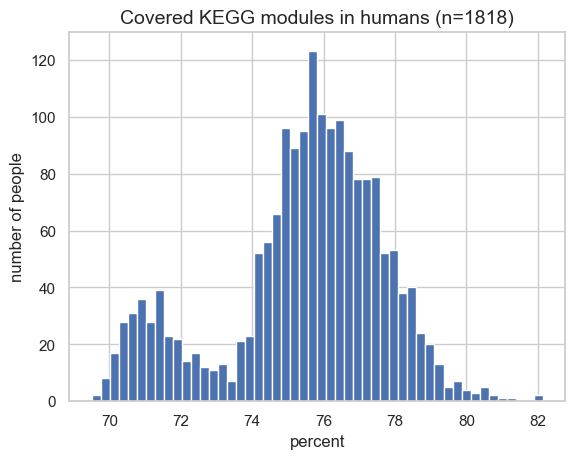

In [95]:
fig, ax = plt.subplots()
ax.hist(percent_overlap_kegg, bins=50)
ax.set_ylim([0, 130]) 
#ax.set_aspect('equal')#, 'box')
# Add labels and title
plt.xlabel('percent', fontsize=12)
plt.ylabel('number of people', fontsize=12)
plt.title('Covered KEGG modules in humans (n='+str(mydata_KEGG.shape[1])+')', fontsize=14)
#plt.hist(percent_overlap_kegg, bins=50)
plt.savefig( figure_folder + 'kegg_modules_coverage_human.pdf',
                format='pdf',
                bbox_inches='tight')

In [96]:
np.mean(percent_overlap_kegg)

75.47077006449804

In [97]:
np.median(percent_overlap_kegg)

75.79505300353357

In [98]:
np.min(percent_overlap_kegg)

69.50819672131148

In [99]:
np.max(percent_overlap_kegg)

82.13552361396304